## Task 3 - Number Recognition

## Loading the Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

## Load the MNIST dataset

In [14]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
# Normalize the images to values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Flatten the images from 28x28 to a 1D array of size 784
train_images = train_images.reshape((len(train_images), 28 * 28))
test_images = test_images.reshape((len(test_images), 28 * 28))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
epochs = 5  # You can increase this for better accuracy
batch_size = 128

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 9s 20ms/step - loss: 0.2788 - accuracy: 0.9198 - val_loss: 0.1196 - val_accuracy: 0.9660
Epoch 2/5
422/422 [==============================] - 8s 19ms/step - loss: 0.1144 - accuracy: 0.9664 - val_loss: 0.1015 - val_accuracy: 0.9688
Epoch 3/5
422/422 [==============================] - 11s 25ms/step - loss: 0.0749 - accuracy: 0.9777 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 4/5
422/422 [==============================] - 9s 22ms/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 5/5
422/422 [==============================] - 9s 22ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0661 - val_accuracy: 0.9813


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0668 - accuracy: 0.9782
Test accuracy: 0.9782000184059143


In [20]:
predictions = model.predict(test_images)

# Convert one-hot encoded predictions back to digit labels
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 4ms/step


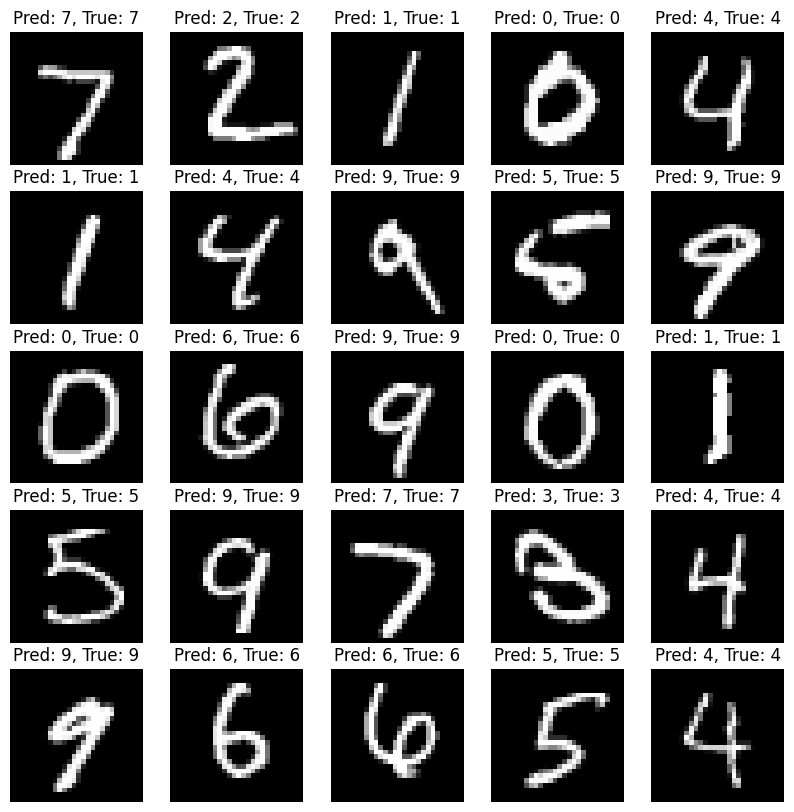

In [21]:
# Plot a few test images along with their predicted and true labels
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}, True: {np.argmax(test_labels[i])}")
    plt.axis('off')
plt.show()
